In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime
import xarray as xr

In [2]:
dado = xr.open_dataset('/home/lipfp/Documentos/Marine_Heatwaves/Rotinas/Brazil_SouthAmerica.nc')

In [3]:
time=dado.time
newtime=[datetime.datetime.fromordinal(int(time[i].data)) for i in range(len(time))] # criando o intervalo de tempo
dado =dado.assign(time=newtime)

In [4]:
del time

In [5]:
dado

<xarray.Dataset>
Dimensions:       (lat: 80, lon: 160, time: 11323)
Coordinates:
  * lat           (lat) float32 -19.875 -19.625 -19.375 ... -0.625 -0.375 -0.125
  * lon           (lon) float32 300.125 300.375 300.625 ... 339.625 339.875
  * time          (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2020-12-31
Data variables:
    mhw_category  (time, lat, lon) int64 ...
Attributes:
    description:  SST and MHW (Benguela and Agulhas).

In [ ]:
## Transformar longitude
# lon=dado.lon
# longitude=dado.lon-360
# dado=dado.assign(lon=longitude)

In [ ]:
# del lon

In [6]:
dado = dado.where(dado>-1000) #filtrando os valores espúrios

In [ ]:
## Caso queira recortar a região para uma área menor, melhor que faça aqui para não ter que definir novas variáveis.
##
## Exemplo de um recorte para uma área de latitude 24N - 30N; longitude 270W - 285W
## dado_recortado=dado.sel(lat=slice(24,30)).sel(lon=slice(270,285))

In [8]:
mhw_category = dado.mhw_category.where(dado.mhw_category>0)
# sst_anom=dado.sst_anom
# sst=dado.sst
# seas=dado.seas
# thresh=dado.thresh
# sst_anom_event=dado.sst_anom.where(dado.mhw_category>0)
# sst_acum=sst_anom_event.where(sst_anom_event>0)

In [9]:
tmean_month=dado.groupby('time.month').mean()     

<Figure size 432x288 with 0 Axes>

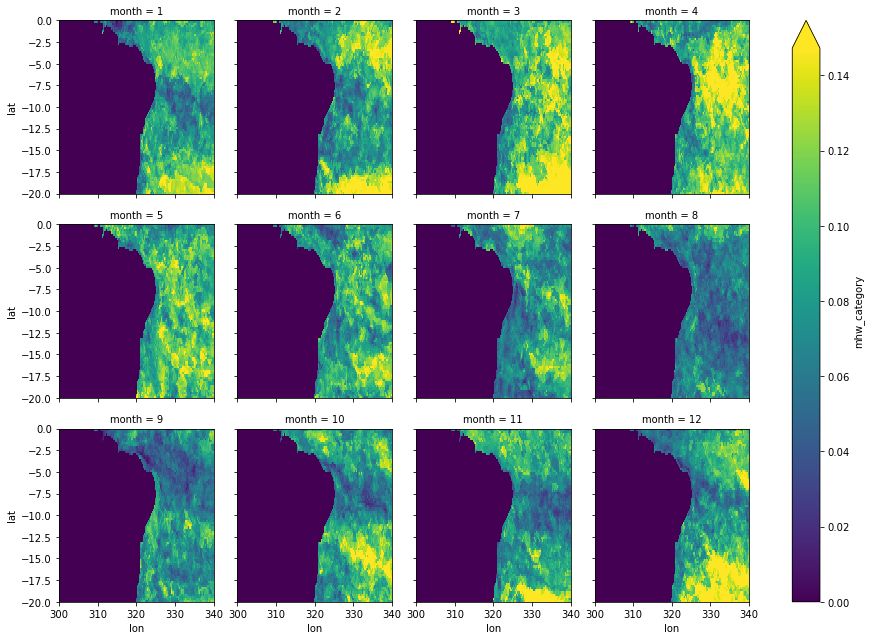

In [10]:
## médias mensais de tsm ( ou qualquer outra variável que queira colocar).
plt.figure()
fg = tmean_month.mhw_category.plot(
    col='month',
    col_wrap=4,
    robust=True)
# plt.savefig('climatology.png')

In [ ]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(300, 20))
)
### somatório dos valores positivos e plotando
sst_acum.sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='hot_r',
    cbar_kwargs={"orientation": "horizontal", "label":"Temperature Intensity (°C-days) | 1982-1985","shrink": 0.8},
    robust=True, levels=15
)
plt.text( 349, -6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
#fig.savefig('Temperature_intensity.jpeg')

In [11]:
##Transformando a variável "mhw_category" para a contagem.
mhw_category_new = mhw_category*0
mhw_category_new = mhw_category_new+1

In [19]:
mhw_category_new_mean=mhw_category_new.sum(dim='time')

In [21]:
vmin=mhw_category_new_mean.min()
vmax=mhw_category_new_mean.max()

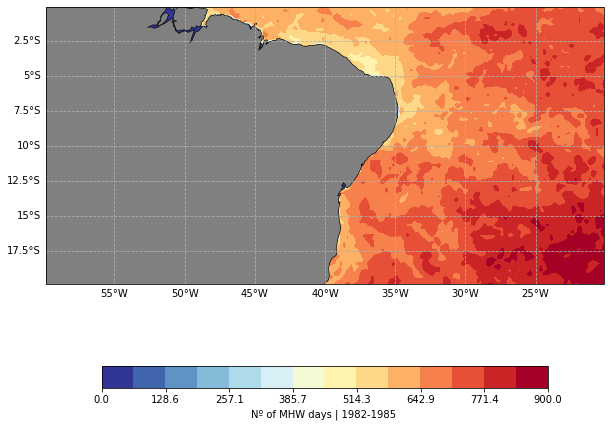

In [22]:
## gráfico mostrando a quantidade de dias com MHW
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.PlateCarree())
)

mhw_category_new_mean.plot.contourf(
    ax=axis,
    vmin=vmin,vmax=vmax,
    transform=ccrs.PlateCarree(), 
    cmap='RdYlBu_r',
    cbar_kwargs={"orientation": "horizontal", "label":"Nº of MHW days | 1982-1985 ","shrink": 0.8},
    robust=True,levels=15
)
# plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.PlateCarree())
# plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.PlateCarree())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels
gl.bottom_labels
fig.set_size_inches(10,10)
fig.savefig('MHW_days.jpeg')

In [ ]:
## Frequência anual
##Obs: Trocar os valores de acordo com o intervalo.
##(nº de MHW)/(número total de dias total/frequência desejada) 
mhw_cat_yearFreq=(mhw_category_new.sum(dim='time'))/(1096/365) 

In [ ]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(300, 20))
)

mhw_cat_yearFreq.plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(), 
    cmap='RdYlBu_r',
    cbar_kwargs={"orientation": "horizontal", "label":"MHW Frequency (MHW/year) | 1982-1985 ","shrink": 0.8},
    robust=True, levels=15
)
plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines() 
axis.add_feature(land, linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
#fig.savefig('MHW_Frequency.jpeg')

In [ ]:
### Abaixo temos exemplos de como realizar gráficos para um intervalo de tempo desejado
### Ex: Foi delimitado o mês de abril de 1983

In [ ]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(300, 20))
)

sst_anom.sel(time='1983-4').mean(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='Spectral_r',
    cbar_kwargs={"orientation": "horizontal","label":"SST anomaly (°C)| April, 1983", "shrink": 0.8},
    robust=True, levels=15
)
plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines()
axis.add_feature(land,linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
fig.savefig('temperature_anomaly.jpeg')

In [ ]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(300, 20))
)

sst_anom_event.sel(time='1983-4').sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='hot_r',
    cbar_kwargs={"orientation": "horizontal","label":"SST intensity (°C-days)| April, 1983", "shrink": 0.8},
    robust=True, levels=15
)
plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines()
axis.add_feature(land,linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
fig.savefig('temperature_intensity_April.jpeg')

In [ ]:
land = cfeature.NaturalEarthFeature('physical', 
                                    'land', 
                                    '50m', 
                                    edgecolor='black',
                                    facecolor='gray')
fig, axis = plt.subplots(
    1, 1, subplot_kw=dict(projection=ccrs.Orthographic(300, 20))
)

mhw_category_new.sel(time='1983-4').sum(dim='time').plot.contourf(
    ax=axis,
    transform=ccrs.PlateCarree(),  
    cmap='hot_r',
    cbar_kwargs={"orientation": "horizontal","label":"MHW Frenquecy | April, 1983", "shrink": 0.8},
    robust=True, levels=15
)
plt.text( 349, - 6, 'South Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
plt.text( 319, 41, 'North Atlantic',fontdict={'fontsize':'12'},horizontalalignment='right', transform=ccrs.Geodetic())
axis.coastlines()
axis.add_feature(land,linewidth=0.25)
gl=axis.gridlines(draw_labels=True,linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=False
gl.bottom_labels=False
fig.set_size_inches(10,10)
fig.savefig('MHW_frequency_April.jpeg')